In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve


In [2]:
def Merton_consumption_finite(r, mu, sigma, delta, p, h, k, T, X):
    
    # Define the market price of risk (Sharpe ratio)
    lam = (mu - r)/sigma
    
    # Define number of time points in grid
    t_p = int(T/h)
    
    # Define number of space points in grid
    x_p = int(X/k)
    
    # Construct time and space arrays
    t = np.linspace(0, T, t_p + 1)
    x = np.linspace(0, X, x_p + 1)
    
    # Initialise empty grid for the value function
    v = np.zeros([t_p + 1, x_p + 1])
    
    # Compute points in v using analytical solution of the value function
    a = p/(1-p) * (r - lam*lam*0.5/(p-1))
    
    for i in t:
        for j in x:
            g = np.exp(a*(i-T)) + np.exp(a*T)*np.exp((T-i)*delta/(p-1))
            v[int(i*t_p), int(j*x_p)] = (j**p)/p * (g**(1-p))
            
    # Setting up axes
    csfont = {'fontname':'Helvetica'}
    fig = plt.figure(figsize=(14,6.5))
    ax = plt.axes(projection ='3d')
    
    # Plotting the value function
    ax.plot_surface(t, x, v, cmap='winter')
    ax.set_xlabel('Time', fontsize=13, **csfont)
    ax.set_ylabel('Initial Portfolio Value $X_0^*$', fontsize=13, **csfont)
    ax.set_zlabel('Value Function', fontsize=13, **csfont)
    ax.view_init(elev=30, azim=-45)
    
    # Save the figure as an image
    plt.savefig('Merton_consumption_finite.png', dpi=800)
    plt.show()


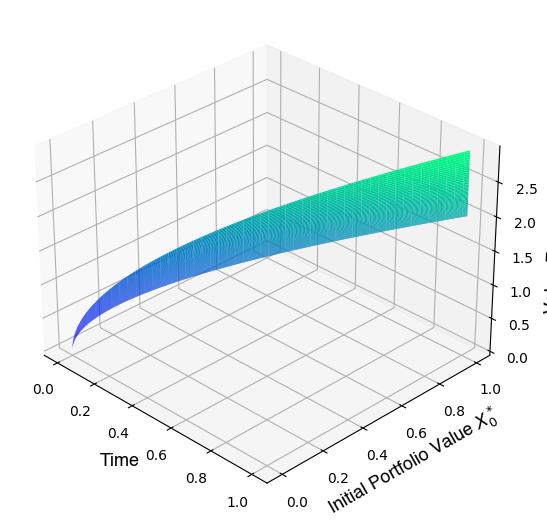

In [3]:
Merton_consumption_finite(0, 0.08, 0.2, 1, 0.5, 0.001, 0.001, 1, 1)


In [4]:
def Merton_consumption_infinite(r, mu, sigma, delta, p, h, k, T, X):
    
    # Define the market price of risk (Sharpe ratio)
    lam = (mu - r)/sigma
    
    # Define number of time points in grid
    t_p = int(T/h)
    
    # Define number of space points in grid
    x_p = int(X/k)
    
    # Construct time and space arrays
    t = np.linspace(0, T, t_p + 1)
    x = np.linspace(0, X, x_p + 1)
    
    # Initialise empty grid for the value function
    v = np.zeros([t_p + 1, x_p + 1])
    
    # Compute points in v using analytical solution of the value function
    for i in t:
        for j in x:
            v[int(i*t_p), int(j*x_p)] = ((j)**p)/(p*(1-p)) * ((delta - p*(r - 0.5*lam*lam/(p-1)))**(p-1))
            
    # Setting up axes
    csfont = {'fontname':'Helvetica'}
    fig = plt.figure(figsize=(14,6.5))
    ax = plt.axes(projection ='3d')
    
    # Plotting the value function
    ax.plot_wireframe(t, x, v, color='mediumseagreen')
    ax.set_xlabel('Time', fontsize=13, **csfont)
    ax.set_ylabel('Initial Portfolio Value $X_0^*$', fontsize=13, **csfont)
    ax.set_zlabel('Value Function', fontsize=13, **csfont)
    ax.view_init(elev=30, azim=-45)
    
    # Save the figure as an image
    plt.savefig('Merton_consumption_infinite.png', dpi=800)
    plt.show()


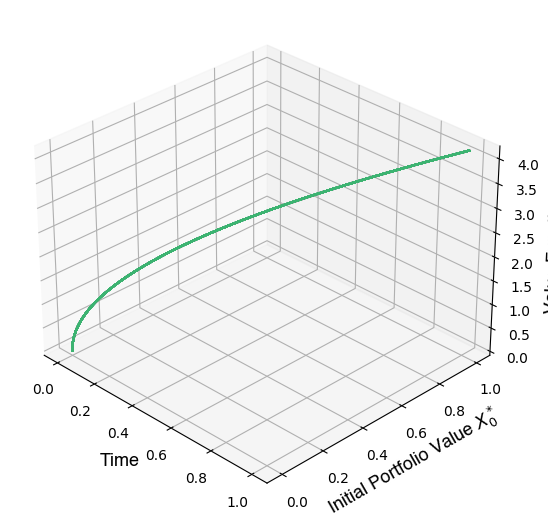

In [5]:
Merton_consumption_infinite(0, 0.08, 0.2, 1, 0.5, 0.001, 0.001, 1, 1)


In [6]:
def Concavification(alpha, B, K, p, k, X):

    # Define number of space points in grid
    x_p = int(X/k)
    
    # Construct the space array
    x = np.linspace(0, X, x_p + 1)
    
    # Construct the objective function \Phi
    Phi = ((alpha*np.maximum(x - B, 0) + K)**p)/p

    # \rho(B)
    intersection = lambda x: (K**p)/p - ((alpha*(x - B) + K)**p)/p + alpha*x*((alpha*(x - B) + K)**(p-1))
    rho = fsolve(intersection, 0.5)[0]
    
    # \Phi(\rho(B))
    Phi_rho = ((alpha*np.maximum(rho - B, 0) + K)**p)/p
    
    # Initialise an empty array for the concavification
    c = np.linspace(0, X, x_p + 1)
    
    for i in range(0, x_p + 1):
        if c[i] < rho:
            c[i] = ((Phi_rho - ((K**p)/p))/rho)*c[i] + (K**p)/p
        else: 
            c[i] = Phi[i]
    
    # Setting up axes
    csfont = {'fontname':'Helvetica'}
    fig, ax = plt.subplots(figsize=(14, 6.5))
    
    # Plotting the concavification
    ax.plot(x, Phi, 'black', label='$\Phi(x, b)$')
    ax.plot(x, c, 'black', label='$\Phi^c(x, b)$', linestyle='dashed')
    ax.plot(rho, Phi_rho, 'o', color='royalblue')
    ax.set_xlabel('Terminal Portfolio Value $X_T^*$', fontsize=16, **csfont)
    ax.set_ylabel('Utility', fontsize=16, **csfont)
    ax.set_xticks([0, B , rho]) 
    ax.set_xticklabels(['$0$', '$b$', '$\\rho(b)$'], fontsize=16, **csfont) 
    ax.set_yticks([(K**p)/p, Phi_rho])
    ax.set_yticklabels(['$\Phi(K)$', '$\Phi(\\rho(b))$'], fontsize=16, **csfont) 
    plt.tick_params() 
    ax.legend(fontsize=16)
    
    # Save the figure as an image
    plt.savefig('Phi^c.png', dpi=800)
    plt.show()

    # Return the concavified function
    return(c)
    

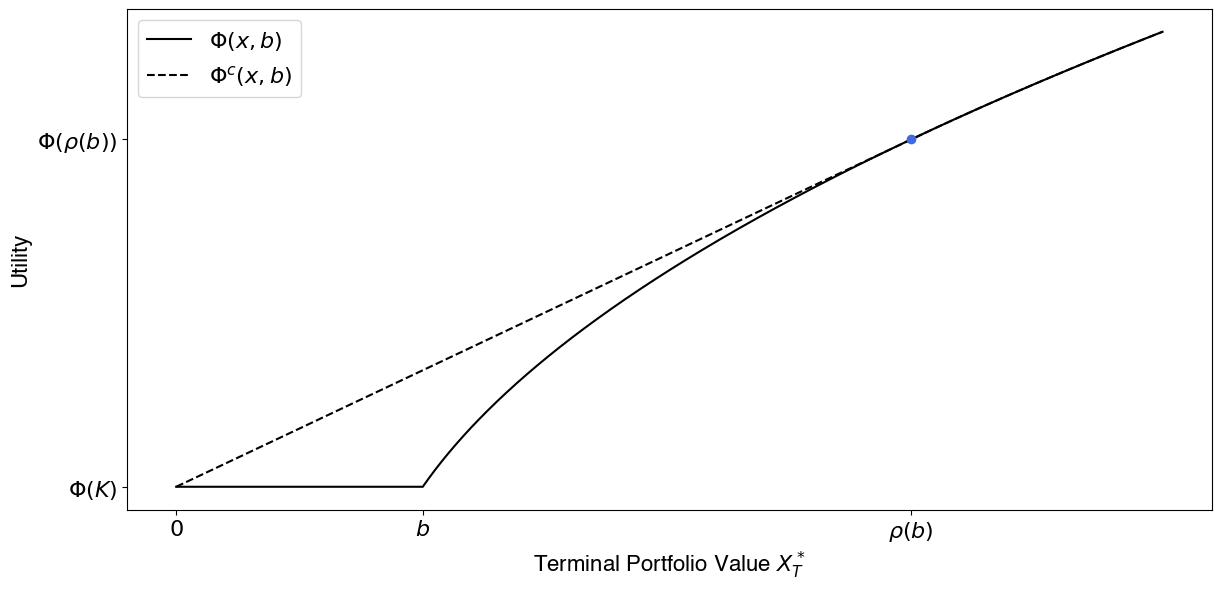

array([0.34641016, 0.34735936, 0.34830856, ..., 1.27121989, 1.27200629,
       1.27279221])

In [7]:
Concavification(0.5, 0.25, 0.03, 0.5, 0.001, 1)


In [8]:
def Option_value_function(r, mu, sigma, delta, alpha, B, K, p, h, k, T, X):
    
    # Define the market price of risk (Sharpe ratio)
    lam = (mu - r)/sigma
    
    # Define number of time points in grid
    t_p = int(T/h)
    
    # Define number of space points in grid
    x_p = int(X/k)
    
    # Construct time and space arrays
    t = np.linspace(0, T, t_p + 1)
    x = np.linspace(0, X, x_p + 1)
    
    # Initialise empty grid for the value function
    v = np.zeros([t_p + 1, x_p + t_p + 1])
    
    # Set initial condition
    v[0,:] = Concavification(alpha, B, K, p, k, X + t_p*k)
    
    # Set boundary condition at x = 0
    for i in t:
        v[int(i*h), 0] = (K**p)/p
    
    # Compute points in v using numerical scheme for the value function
    for i in range(1, t_p + 1):
        for j in range(1, x_p + t_p + 1 - i):
            if (v[i-1, j+1] - 2*v[i-1, j] + v[i-1, j-1]) == 0:
                v[i, j] = np.inf
            else:
                v[i, j] = v[i-1, j] + (r*h*0.5)*(v[i-1, j+1] - v[i-1, j-1]) - (0.125*lam*lam*h)*(v[i-1, j+1] - v[i-1, j-1])*(v[i-1, j+1] - v[i-1, j-1])/(v[i-1, j+1] - 2*v[i-1, j] + v[i-1, j-1])

    # Reversing the time substitution t = T - tau
    v = np.flipud(v)

    # Setting up axes
    csfont = {'fontname':'Helvetica'}
    fig, ax = plt.subplots(figsize=(14, 6.5))
    
    # Plotting the value function
    ax.plot(x, v[0, 0:(x_p + 1)], 'r')
    ax.set_xlabel('Initial Portfolio Value $X_0^*$', fontsize=16, **csfont)
    ax.set_ylabel('Value Function', fontsize=16, **csfont)
    
    # Save the figure as an image
    plt.savefig('Option_value_function.png', dpi=800)
    plt.show()
    
    # Return the value function and number of time/space points used
    return(v, t_p, x_p)


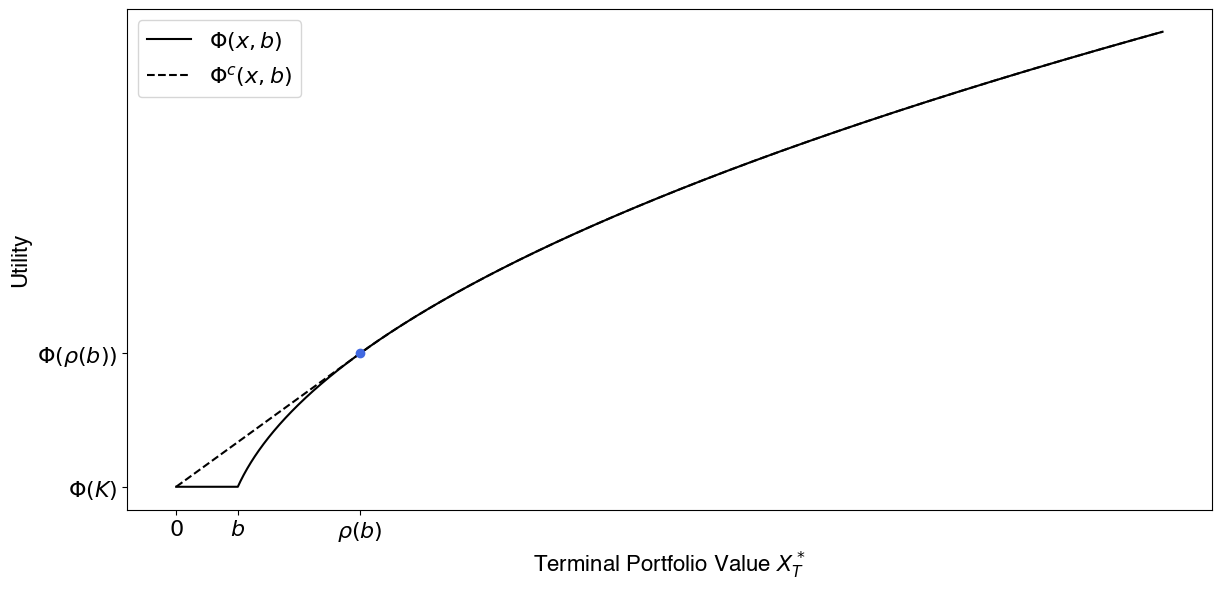

/var/folders/mv/h7wy_67d4rl802h9yk6t4zv80000gn/T/ipykernel_7438/2113855238.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  if (v[i-1, j+1] - 2*v[i-1, j] + v[i-1, j-1]) == 0:
/var/folders/mv/h7wy_67d4rl802h9yk6t4zv80000gn/T/ipykernel_7438/2113855238.py:32: RuntimeWarning: invalid value encountered in scalar multiply
  v[i, j] = v[i-1, j] + (r*h*0.5)*(v[i-1, j+1] - v[i-1, j-1]) - (0.125*lam*lam*h)*(v[i-1, j+1] - v[i-1, j-1])*(v[i-1, j+1] - v[i-1, j-1])/(v[i-1, j+1] - 2*v[i-1, j] + v[i-1, j-1])
/var/folders/mv/h7wy_67d4rl802h9yk6t4zv80000gn/T/ipykernel_7438/2113855238.py:32: RuntimeWarning: invalid value encountered in scalar subtract
  v[i, j] = v[i-1, j] + (r*h*0.5)*(v[i-1, j+1] - v[i-1, j-1]) - (0.125*lam*lam*h)*(v[i-1, j+1] - v[i-1, j-1])*(v[i-1, j+1] - v[i-1, j-1])/(v[i-1, j+1] - 2*v[i-1, j] + v[i-1, j-1])
/var/folders/mv/h7wy_67d4rl802h9yk6t4zv80000gn/T/ipykernel_7438/2113855238.py:29: RuntimeWarning: invalid value encountered in scalar add
  if (v[i-1, j+1] - 

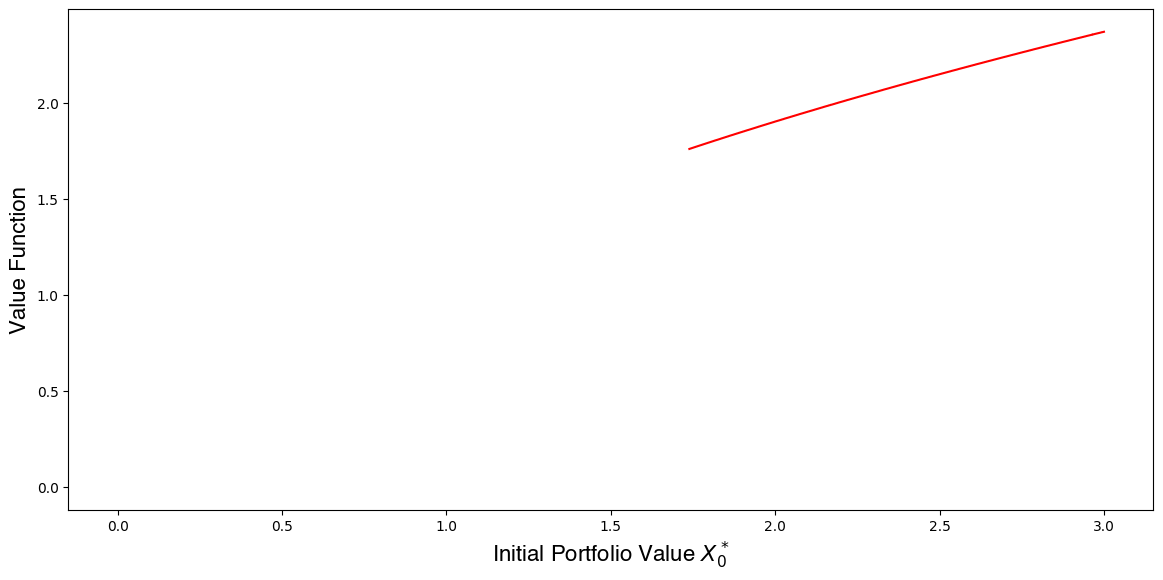

In [9]:
Value_function = Option_value_function(0, 0.08, 0.2, 1, 0.5, 0.25, 0.03, 0.5, 0.001, 0.001, 1, 3)


In [10]:
def Option_fraction_of_wealth(v, r, mu, sigma, delta, alpha, B, K, p, h, k, T, X):
    
    # Extract the value function, number of time points and number of space points
    v, t_pv, x_pv = v[0], v[1], v[2]
    
    # Define the market price of risk lambda
    lam = (mu - r)/sigma
    
    # Define number of time points in grid (does not necessarily need to be the same as in the value function)
    t_p = int(T/h)
    
    # Define number of space points in grid (does not necessarily need to be the same as in the value function)
    x_p = int(X/k)
    
    # Construct the space array
    x = np.linspace(k, X - k, x_p - 1)
    
    # Initialise empty grid for the optimal trading strategy
    pi = np.zeros([t_p + 1, x_p + 1])

    # Compute points in pi using numerical scheme for the optimal trading strategy
    for j in range(1, x_p):
        if j >int(B*x_p):
            
            # Interpolation indices
            i_l = int((j-1) * x_pv/x_p)
            i_m = int(j * x_pv/x_p)
            i_u = int((j+1) * x_pv/x_p)
        
            # Numerical scheme to find the initial optimal trading strategy (t = 0)
            pi[0, j] = - (lam*k)/(2*sigma) * (v[0, i_u] - v[0, i_l])/(v[0, i_u] - 2*v[0, i_m] + v[0, i_l])
        
        else:
            pi[0, j] = np.inf
    
    # Setting up axes
    csfont = {'fontname':'Helvetica'}
    fig, ax = plt.subplots(figsize=(14, 6.5))
    
    # Defining the optimal fraction of wealth
    theta = pi[0, 1:x_p]/x
    
    # Extracting finite terms
    indices = np.where(np.isfinite(theta))
    theta, x = theta[indices], x[indices]
    
    # Interpolation
    f = np.polyfit(x, theta, 2)
    f_theta = np.polyval(f, x)
    
    # Merton constant
    M = [- lam/(sigma*(p-1))] * len(x)
    
    # Plotting the optimal fraction of wealth
    ax.plot(x, f_theta, color='mediumseagreen', label = '$\\theta_0^*$')
    ax.plot(x, M, color='royalblue', label = 'Merton Constant', linestyle='dashed')
    ax.set_xlabel('Initial Portfolio Value $X_0^*$', fontsize=16, **csfont)
    ax.set_ylabel('Optimal Fraction Of Wealth', fontsize=16, **csfont)
    ax.set_xticks([x[0]]) 
    ax.set_xticklabels(['$\\rho(B_T)$'], fontsize=16, **csfont) 
    ax.set_yticks([M[0]])
    ax.set_yticklabels(['$-\\frac{\\lambda}{\\sigma (p-1)}$'], fontsize=16, **csfont) 
    plt.tick_params() 
    ax.legend(fontsize=16)
    
    # Save the figure as an image
    plt.savefig('Option_fraction_of_wealth.png', dpi=800)
    plt.show()
    plt.show()
    

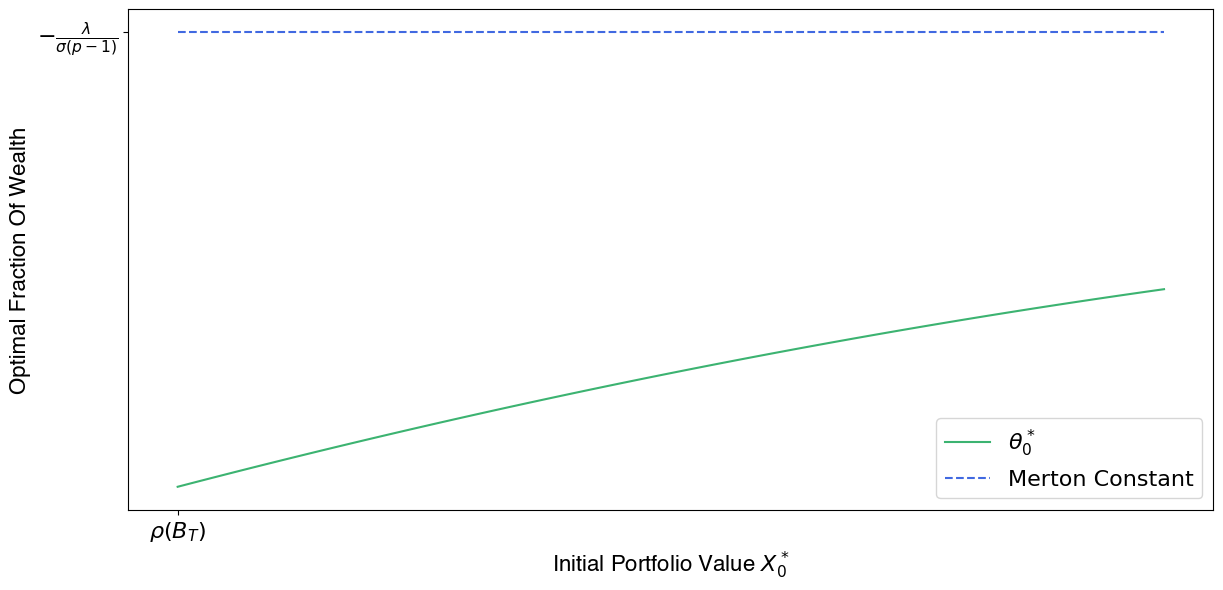

In [11]:
Option_fraction_of_wealth(Value_function, 0, 0.08, 0.2, 1, 0.5, 0.25, 0.03, 0.5, 0.01, 0.01, 1, 3)
